# Robot movment Visualizer

1. Clear the debug_log file 
2. Run one simulation
3. Run this notebook 

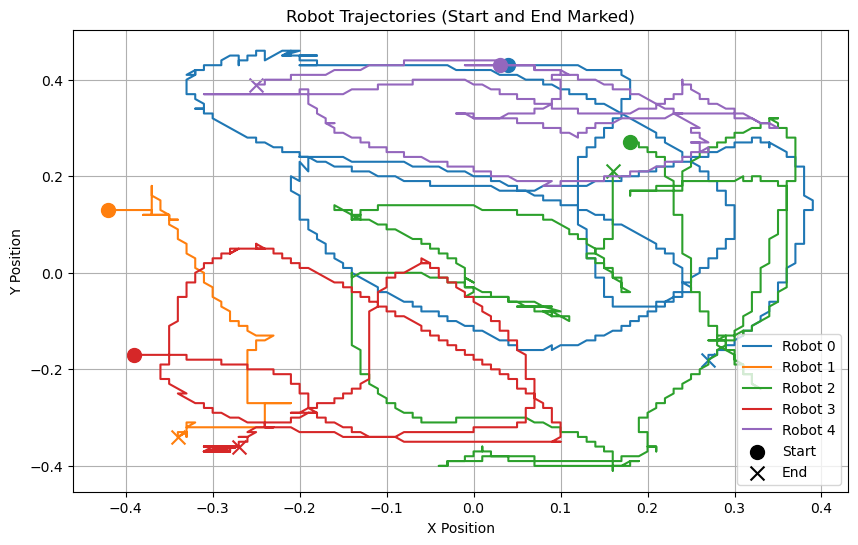

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the log file
log_file = "webots/controllers/epuck_crown/debug_log.txt"
data = []

# Parse the log file
with open(log_file, "r") as f:
    for line in f:
        if "time =" in line:
            parts = line.split(",")
            time = int(parts[0].split("=")[1].strip())
            robot_id = int(parts[1].split("=")[1].strip())
            x = float(parts[2].split("=")[1].strip())
            y = float(parts[3].split("=")[1].strip())
            theta = float(parts[4].split("=")[1].strip())
            data.append({"time": time, "robot_id": robot_id, "x": x, "y": y, "theta": theta})

# Convert to DataFrame
df = pd.DataFrame(data)

# Filter out initial (0, 0) positions for each robot
filtered_data = []
for robot_id in df['robot_id'].unique():
    robot_data = df[df['robot_id'] == robot_id]
    non_zero_index = robot_data[(robot_data['x'] != 0) | (robot_data['y'] != 0)].index.min()
    if non_zero_index is not None:
        filtered_data.append(robot_data.loc[non_zero_index:])

filtered_df = pd.concat(filtered_data)

# Plot robot trajectories
plt.figure(figsize=(10, 6))
for robot_id in filtered_df['robot_id'].unique():
    robot_data = filtered_df[filtered_df['robot_id'] == robot_id]
    x_start, y_start = robot_data.iloc[0]['x'], robot_data.iloc[0]['y']
    x_end, y_end = robot_data.iloc[-1]['x'], robot_data.iloc[-1]['y']
    
    # Plot trajectory
    trajectory_color = plt.plot(robot_data['x'], robot_data['y'], label=f'Robot {robot_id}')[0].get_color()
    
    # Add circle at the start (same color as trajectory)
    plt.scatter(x_start, y_start, color=trajectory_color, marker='o', s=100)
    
    # Add cross at the end (same color as trajectory)
    plt.scatter(x_end, y_end, color=trajectory_color, marker='x', s=100)

# Add a generic legend for Start and End
plt.scatter([], [], color='black', marker='o', s=100, label='Start')
plt.scatter([], [], color='black', marker='x', s=100, label='End')

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Robot Trajectories (Start and End Marked)')
plt.legend()
plt.grid()
plt.show()
